In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

# Part 1: Prepare the Data

In [3]:
# 1.1 Read myopia.csv into a Pandas DataFrame.
file_path = 'Resources/myopia.csv'
data_df = pd.read_csv(file_path)
data_df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [4]:
# Get the shape (number of columns and rows) of the DataFrame
data_df.shape

(618, 15)

In [5]:
# Get the column names
data_df.columns

Index(['AGE', 'SPHEQ', 'AL', 'ACD', 'LT', 'VCD', 'SPORTHR', 'READHR', 'COMPHR',
       'STUDYHR', 'TVHR', 'DIOPTERHR', 'MOMMY', 'DADMY', 'MYOPIC'],
      dtype='object')

In [6]:
# Find out if there are any missing/null values
data_df.isnull().sum()

AGE          0
SPHEQ        0
AL           0
ACD          0
LT           0
VCD          0
SPORTHR      0
READHR       0
COMPHR       0
STUDYHR      0
TVHR         0
DIOPTERHR    0
MOMMY        0
DADMY        0
MYOPIC       0
dtype: int64

In [7]:
# obtain Statistical summary
data_df.describe()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
count,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000
mean,6.299353,0.801010,22.496780,3.578629,3.541453,15.376780,11.953074,2.796117,2.105178,1.490291,8.948220,26.017799,0.506472,0.498382,0.131068
std,0.712950,0.625918,0.680141,0.230394,0.154519,0.664183,7.968296,3.068191,3.056508,2.216207,5.719021,16.031715,0.500363,0.500402,0.337748
min,5.000000,-0.699000,19.900000,2.772000,2.960000,13.380000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
25%,6.000000,0.456250,22.040001,3.424000,3.436000,14.930000,6.000000,0.000000,0.000000,0.000000,4.250000,15.000000,0.000000,0.000000,0.000000
50%,6.000000,0.729000,22.464999,3.585000,3.542000,15.360000,10.000000,2.000000,1.000000,1.000000,8.000000,23.000000,1.000000,0.000000,0.000000
75%,6.000000,1.034000,22.969999,3.730000,3.640000,15.840000,16.000000,4.000000,3.000000,2.000000,12.000000,34.000000,1.000000,1.000000,0.000000
max,9.000000,4.372000,24.559999,4.250000,4.112000,17.299999,45.000000,20.000000,30.000000,15.000000,31.000000,101.000000,1.000000,1.000000,1.000000


In [8]:
# 1.2 Remove the "MYOPIC" column from the dataset.
cleaned_df = data_df.drop('MYOPIC', axis=1)
cleaned_df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [9]:
# Save the cleaned dataframe as a new csv file for future analysis
file_path = 'Resources/cleaned_myopia.csv'
cleaned_df.to_csv(file_path, index=False)

In [10]:

# 1.3 Standardize your dataset so that columns that contain larger values do not influence 
# the outcome more than columns with smaller values:

# Create a scaler to standardize the data
scaler = StandardScaler()

# Train the scaler with the data.
X_scaled = scaler.fit_transform(cleaned_df)

In [11]:
# There are 14 dimensions (features/columns) in the Myopia Datasets 
X_scaled[0]

array([-0.42021911, -1.3639169 , -0.89286146,  0.48378402, -0.28144315,
       -1.0197916 ,  4.1506609 ,  1.69744958, -0.68931054, -0.67299591,
        0.18405806,  0.49830393,  0.98713773,  1.0032415 ])

# Part 2: Apply Dimensionality Reduction

In [12]:
# Applying PCA to reduce dimensions from 4 to 2

# Initialise PCA model
pca = PCA(n_components=0.90)

# Get two principal components for the iris data.
myopic_pca = pca.fit_transform(X_scaled)


In [13]:
pca.explained_variance_ratio_

array([0.21177355, 0.15659716, 0.08688023, 0.08301762, 0.07584858,
       0.06997878, 0.06486986, 0.06377808, 0.05393666, 0.05205566])

In [14]:
pca.explained_variance_ratio_.sum()

0.9187361702915187

In [15]:
# Initialise t-SNE model
tsne = TSNE(learning_rate=35)

In [16]:
# Reduce dimensions
tsne_features = tsne.fit_transform(myopic_pca)

C:\Users\johns\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [17]:
# The dataset has 2 columns
tsne_features.shape

(618, 2)

In [18]:
# Prepare to plot the dataset

# The first column of transformed features
x = tsne_features[:,0]

# The second column of transformed features
y = tsne_features[:,1]

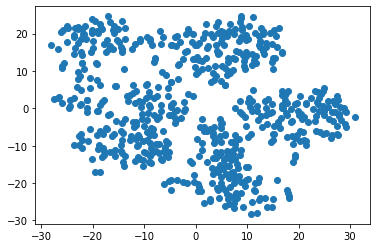

In [19]:
# Visualise the clusters
plt.scatter(x, y)
plt.show()

## Are there distinct clusters?

From looking at the scatter plot, we can see that they are 5-6 different clusters 

# Part 3: Perform a Cluster Analysis with K-means

In [20]:
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(myopic_pca)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

C:\Users\johns\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


,k,inertia
0,1,7948.905345
1,2,6794.415695
2,3,6031.097742
3,4,5662.587617
4,5,5376.410589


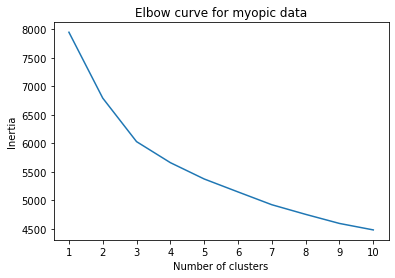

In [21]:
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for myopic data')
plt.show()

## Part 4: Recommendation

Based on the findings after running k-means and t-sne. It seems like the patients can be clustered into 3-5 meaningful clusters because t-sne gave us 5 different clusters and k-means gave us 3 clusters.